5518750.0 120.0
1805196.280991736 109.0909090909091
1452386.3636363635 87.27272727272728
1382280.106257379 81.21212121212122
1356843.0517294153 77.57575757575758
1345188.7678437266 76.36363636363636
1338747.880906972 75.15151515151516
1334773.875114784 73.93939393939394


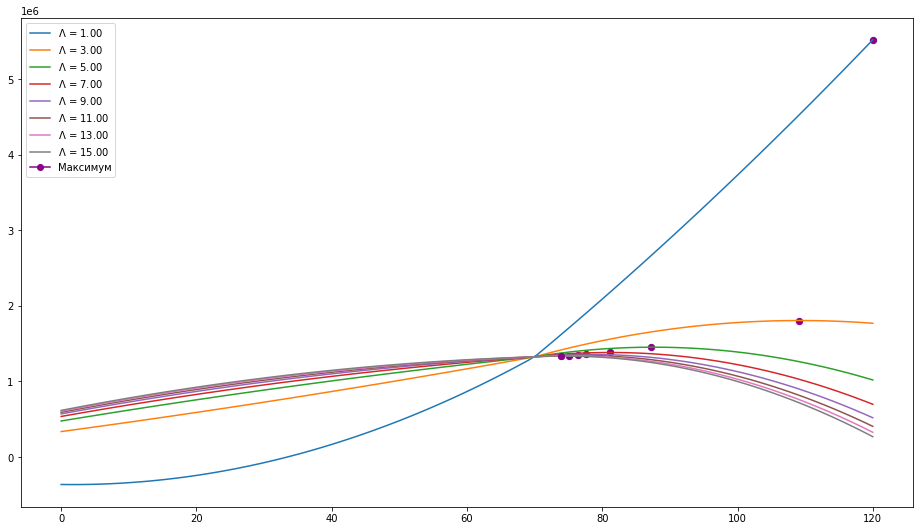

In [35]:
import numpy as np
import math
import scipy.integrate
import matplotlib.pyplot as plt

def func(u = 60, tau = 500, alpha = 5, del0 = 30, c1 = 20, c2 = 30, c3 = 100, d1 = 15, d2 = 40, lamb1 = 1):
  f0 = lambda t: alpha * d1 * (tau - alpha*t) - c1 * (tau - alpha*t)
  f1 = lambda t: alpha * d2 * (tau - alpha*t) - c2 * (tau - alpha*t)

  s = 0
  s, _ = scipy.integrate.quad(f1, 0, u+del0)

  if (u <=  tau / alpha - del0):
    s, _ = scipy.integrate.quad(f0, 0, u+del0)
    s -= c1 * (tau - alpha * (u + del0)) * alpha / lamb1 * (u + del0) + c3 * (alpha * (u + del0))
  if (u > tau / alpha - del0):
    s, _ = scipy.integrate.quad(f0, 0, u+del0)
    s2, _ = scipy.integrate.quad(f1, tau/alpha, u+del0)
    s += s2 - c2*(tau - alpha * (u + del0)) * alpha / lamb1 * (u + del0) - c3 * (alpha * (u + del0))
  return s

u_max = 120
num = 100
U = np.linspace(0, u_max, num)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (16, 9))

for lambt in range (1, 17, 2):
  f_max = 0
  u_best = 0
  F = np.zeros(num)
  for i in range (U.size):
    F[i] = func(u = U[i], lamb1 = lambt)
    if (f_max < F[i]):
      f_max = F[i]
      u_best = U[i]
  print(f_max, u_best)
  plt.scatter(u_best, f_max, color='darkmagenta', s = 40, marker='o')
  ax.plot(U, F, label='$\Lambda$ = {:.2f}'.format(lambt))
ax.plot(u_best, f_max, label='Максимум', color='darkmagenta', marker='o')
ax.legend(loc='best')

